# CNN\RNN\LTSM\双向LSTM\GRU

设置一些常见的超参数
把常见模型做成def函数

# 导入基础包

In [4]:
# 两种方法
import keras
import numpy as np
import pandas

# 数据导入 
以MINIST作为实力样本

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


# 绘制图像

In [5]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot

In [6]:
# Sequential按顺序构成的模型
from keras.models import Sequential
# Dense全连接层
from keras.layers import Dense,Activation,Dropout,Convolution2D,MaxPool2D,Flatten

# RNN的模型
from keras.layers import SimpleRNN,LSTM,GRU
# RNN模型
from keras.layers import Dense, LSTM, Lambda, TimeDistributed, Input, Masking, Bidirectional

# 优化器
from keras.optimizers import SGD,Adam

# 记录损失值

In [7]:
from pandas import DataFrame
# 准确率
results = DataFrame()
# 损失值
lossresults = DataFrame()

In [ ]:
#序列长度 一共28行
time_steps=28
# 数据长度 一行28个元素
input_size=28
#隐藏层 size 50
cell_size=50

model=Sequential()
model.add(Bidirectional(LSTM(cell_size,input_shape=(time_steps,input_size),return_sequences=False)
                        ,merge_mode='concat'))
model.add(Dense(10,activation='softmax'))

#编译模型
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#训练模型
hist=model.fit(x_train,y_train1,batch_size=500,nb_epoch=3)
#查看网络结构
model.summary()





In [32]:
# 例如
# （a,b）
# a是样本数,b是特征值 这个特征值一般都是卷积核/序列长度这些

# 卷积核
cnn_steps=28
#序列长度 一共28行
time_steps=28
# 数据长度 一行28个元素
input_size=28
#隐藏层 size 50
cell_size=50
# 通道数
rgb=3


'''
# sum merge
# mul merge
# avg merge
# concat merge
'''
i=1
modelList=['sum','mul','ave','concat']
mode=modelList[i]

BATCH_SIZE=500
EPOCH=3

#这是MINIST的分类数
NUM_CLASS=10

# RNN的数据集划分

In [24]:

# 载入数据
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print('xtrain',x_train.shape)
print('ytrain',y_train.shape)
print('xtest',x_test.shape)
print('ytest',y_test.shape)

# -1是自动转换，255.0是为了归一化
# (60000, 28, 28)->(60000, 28,28,1)转化形式
x_train1=x_train/255.0
x_test1=x_test/255.0

print('='*28)
print('xtrain',x_train1.shape)
print('xtest',x_test1.shape)
print('ytrain',y_train.shape)
print('ytest',y_test.shape)


xtrain (60000, 28, 28)
ytrain (60000,)
xtest (10000, 28, 28)
ytest (10000,)
xtrain (60000, 28, 28)
xtest (10000, 28, 28)
ytrain (60000,)
ytest (10000,)


# CNN数据集划分

In [25]:
# # 载入数据
# (x_train,y_train),(x_test,y_test)=mnist.load_data()

# print('xtrain',x_train.shape)
# print('ytrain',y_train.shape)

# -1是自动转换，255.0是为了归一化
# (60000, 28, 28)->(60000, 28,28,1)转化形式
x_train2=x_train.reshape(-1,28,28,1)/255.0
x_test2=x_test.reshape(-1,28,28,1)/255.0

print('xtrain',x_train2.shape)
print('xtest',x_test2.shape)

xtrain (60000, 28, 28, 1)
xtest (10000, 28, 28, 1)


In [21]:
# 转化成one-hot格式
y_train1=np_utils.to_categorical(y_train,num_classes=NUM_CLASS)
y_test1=np_utils.to_categorical(y_test,num_classes=NUM_CLASS)

In [23]:
print('RNN类型的训练',y_train1.shape)
print('RNN模型的测试',y_test1.shape)

RNN类型的训练 (60000, 10)
RNN模型的测试 (10000, 10)


In [26]:
def get_bi_lstm_model(timesteps,input_size,cell_size,BATCH_SIZE,EPOCH, mode):
    print('连接模式是：',mode)
    model = Sequential()
#     model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(timesteps, 1), merge_mode=mode))
    model.add(Bidirectional(LSTM(cell_size,input_shape=(time_steps,input_size),return_sequences=False)
                        ,merge_mode=mode))
#     model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.add(Dense(10,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    hist=model.fit(x_train1,y_train1,batch_size=BATCH_SIZE,nb_epoch=EPOCH)
    #查看网络结构
    model.summary()
    loss=hist.history['loss']
    accuracy=hist.history['accuracy']
    return loss,accuracy

In [29]:
lossresults['mul_bi_lstm'],results['mul_bi_lstm']=get_bi_lstm_model(time_steps,input_size,cell_size,BATCH_SIZE,EPOCH,"mul")
# hist3.history['accuracy']
# =hist3.history['loss']

连接模式是： mul


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/3
60000/60000 [==============================] - 25s 416us/step - loss: 1.4446 - accuracy: 0.5234
Epoch 2/3
60000/60000 [==============================] - 24s 400us/step - loss: 0.4596 - accuracy: 0.8596
Epoch 3/3
60000/60000 [==============================] - 23s 387us/step - loss: 0.2791 - accuracy: 0.9168
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 50)                31600     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 32,110
Trainable params: 32,110
Non-trainable params: 0
_________________________________________________________________


In [30]:
lossresults['sum_bi_lstm'],results['sum_bi_lstm']=get_bi_lstm_model(time_steps,input_size
                                                                    ,cell_size
                                                                    ,BATCH_SIZE,EPOCH,"sum")
# hist3.history['accuracy']
# =hist3.history['loss']

连接模式是： sum


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/3
60000/60000 [==============================] - 24s 399us/step - loss: 1.2310 - accuracy: 0.5921
Epoch 2/3
60000/60000 [==============================] - 23s 382us/step - loss: 0.3091 - accuracy: 0.9063
Epoch 3/3
60000/60000 [==============================] - 23s 386us/step - loss: 0.1880 - accuracy: 0.9437
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 50)                31600     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 32,110
Trainable params: 32,110
Non-trainable params: 0
_________________________________________________________________


In [33]:
lossresults['ave_bi_lstm'],results['ave_bi_lstm']=get_bi_lstm_model(time_steps,input_size
                                                                    ,cell_size
                                                                    ,BATCH_SIZE,EPOCH,"ave")
# hist3.history['accuracy']
# =hist3.history['loss']

连接模式是： ave


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/3
60000/60000 [==============================] - 24s 406us/step - loss: 1.3449 - accuracy: 0.5785
Epoch 2/3
60000/60000 [==============================] - 23s 381us/step - loss: 0.3810 - accuracy: 0.8944
Epoch 3/3
60000/60000 [==============================] - 24s 403us/step - loss: 0.2252 - accuracy: 0.9362
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 50)                31600     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 32,110
Trainable params: 32,110
Non-trainable params: 0
_________________________________________________________________


In [34]:
lossresults['concat_bi_lstm'],results['concat_bi_lstm']=get_bi_lstm_model(time_steps,input_size
                                                                    ,cell_size
                                                                    ,BATCH_SIZE,EPOCH,"concat")
# hist3.history['accuracy']
# =hist3.history['loss']

连接模式是： concat


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/3
60000/60000 [==============================] - 26s 428us/step - loss: 1.2794 - accuracy: 0.5989
Epoch 2/3
60000/60000 [==============================] - 24s 405us/step - loss: 0.3393 - accuracy: 0.8984
Epoch 3/3
60000/60000 [==============================] - 24s 394us/step - loss: 0.2026 - accuracy: 0.9391
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 100)               31600     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 32,610
Trainable params: 32,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
#parameters for LSTM
nb_lstm_outputs = 50  #神经元个数
nb_time_steps = 28  #时间序列长度
nb_input_vector = 28 #输入序列

In [35]:
def get_lstm_model(nb_time_steps,nb_input_vector,nb_lstm_outputs,NUM_CLASS,BATCH_SIZE,EPOCH):
    print('运行模式是：','lstm')
     #build model
    model = Sequential()
    model.add(LSTM(units=nb_lstm_outputs, input_shape=(nb_time_steps, nb_input_vector)))
    model.add(Dense(NUM_CLASS, activation='softmax'))
    
#     model = Sequential()
# #     model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(timesteps, 1), merge_mode=mode))
#     model.add(Bidirectional(LSTM(cell_size,input_shape=(time_steps,input_size),return_sequences=False)
#                         ,merge_mode=mode))
# #     model.add(TimeDistributed(Dense(1, activation='sigmoid')))
#     model.add(Dense(10,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    hist=model.fit(x_train1,y_train1,batch_size=BATCH_SIZE,nb_epoch=EPOCH)
    #查看网络结构
    model.summary()
    loss=hist.history['loss']
    accuracy=hist.history['accuracy']
    return loss,accuracy

In [37]:
lossresults['lstm'],results['lstm']=get_lstm_model(nb_time_steps,nb_input_vector,nb_lstm_outputs,
                                                  NUM_CLASS,BATCH_SIZE,EPOCH)
# hist3.history['accuracy']
# =hist3.history['loss']

连接模式是： lstm


C:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 14s 228us/step - loss: 1.5166 - accuracy: 0.4852
Epoch 2/3
60000/60000 [==============================] - 14s 232us/step - loss: 0.5278 - accuracy: 0.8436
Epoch 3/3
60000/60000 [==============================] - 15s 245us/step - loss: 0.3072 - accuracy: 0.9100
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50)                15800     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [46]:
# GRU 的参数
CELL_SIZE = 50
TIME_STEPS = 28
INPUT_SIZE = 28


In [47]:
def get_gru_model(TIME_STEPS,INPUT_SIZE ,CELL_SIZE,NUM_CLASS,BATCH_SIZE,EPOCH):
    print('运行模式是：','GRU')
#      #build model
#     model = Sequential()
#     model.add(LSTM(units=nb_lstm_outputs, input_shape=(nb_time_steps, nb_input_vector)))
#     model.add(Dense(NUM_CLASS, activation='softmax'))
    
     #build model
        # model.add(LSTM(units=nb_lstm_outputs, input_shape=(nb_time_steps, nb_input_vector)))
# model.add(Dense(2, activation='softmax'))


# x = GRU(CELL_SIZE, input_shape = (TIME_STEPS,INPUT_SIZE))(inputs)
# x = Dense(OUTPUT_SIZE)(x)
# x = Activation("softmax")(x)
    model = Sequential()

    model.add(GRU(units=CELL_SIZE, input_shape=(TIME_STEPS, INPUT_SIZE)))
    
#     model = Sequential()
# #     model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(timesteps, 1), merge_mode=mode))
#     model.add(Bidirectional(LSTM(cell_size,input_shape=(time_steps,input_size),return_sequences=False)
#                         ,merge_mode=mode))
# #     model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.add(Dense(NUM_CLASS,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    hist=model.fit(x_train1,y_train1,batch_size=BATCH_SIZE,nb_epoch=EPOCH)
    #查看网络结构
    model.summary()
    loss=hist.history['loss']
    accuracy=hist.history['accuracy']
    return loss,accuracy

In [48]:
lossresults['gru'],results['gru']=get_gru_model(TIME_STEPS,INPUT_SIZE ,CELL_SIZE,NUM_CLASS,BATCH_SIZE,EPOCH)

运行模式是： GRU


C:\anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 13s 211us/step - loss: 1.7194 - accuracy: 0.4108
Epoch 2/3
60000/60000 [==============================] - 12s 197us/step - loss: 0.6621 - accuracy: 0.7871
Epoch 3/3
60000/60000 [==============================] - 14s 239us/step - loss: 0.3469 - accuracy: 0.8986
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 50)                11850     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 12,360
Trainable params: 12,360
Non-trainable params: 0
_________________________________________________________________


In [49]:
#序列长度 一共28行
time_steps=28
# 数据长度 一行28个元素
input_size=28
#隐藏层 size 50
cell_size=50

In [50]:
def get_rnn_model(time_steps,input_size ,cell_size,NUM_CLASS,BATCH_SIZE,EPOCH):
    print('运行模式是：','RNN')
    # 创建模型,输入784个神经元，输出10个神经元
    model=Sequential(
    # [Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')]
    )
    # 第一个卷积层


    model.add(
    SimpleRNN(
    units=cell_size , # 输出
    input_shape=(time_steps,input_size)    # 输入
    ))

#     model.add(
#     Dense(2,activation='softmax')
#     )
    model.add(Dense(NUM_CLASS,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    hist=model.fit(x_train1,y_train1,batch_size=BATCH_SIZE,nb_epoch=EPOCH)
    #查看网络结构
    model.summary()
    loss=hist.history['loss']
    accuracy=hist.history['accuracy']
    return loss,accuracy

In [51]:
lossresults['rnn'],results['rnn']=get_rnn_model(TIME_STEPS,INPUT_SIZE ,CELL_SIZE,NUM_CLASS,BATCH_SIZE,EPOCH)

运行模式是： RNN


C:\anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 5s 76us/step - loss: 1.3359 - accuracy: 0.5638
Epoch 2/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.6563 - accuracy: 0.7936
Epoch 3/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.4812 - accuracy: 0.8544
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 卷积核
cnn_steps=28
# 数据长度 一行28个元素
input_size=28
#隐藏层 size 50
cell_size=50
# 通道数
# 这是一个三色道
rgb=1

In [59]:
def get_cnn_model(cnn_steps,input_size,cell_size,rgb,NUM_CLASS,BATCH_SIZE,EPOCH):
    print('运行模式是：','CNN')
    # 创建模型,输入784个神经元，输出10个神经元
    model=Sequential(
    # [Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')]
    )
    # 第一个卷积层
    model.add(
    Convolution2D(input_shape=(cnn_steps,input_size,rgb),filters=32,
    kernel_size=5,
    strides=1,
    padding='same',
    activation='relu'
    )
    )
    model.add(
    MaxPool2D(
    pool_size=2, strides=2, padding='same'
    )
    )
    # 第二个卷积层
    model.add(
    Convolution2D(
    64,
    5,
    strides=1,
    padding='same',
    activation='relu'
    )
    )
    model.add(
    MaxPool2D(
    2,2, 'same'
    )
    )
    model.add(Flatten())
    model.add(
    Dense(1024,activation='relu')
    )
    model.add(
    Dropout(0.4)
    )
    model.add(Dense(NUM_CLASS,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    hist=model.fit(x_train2,y_train1,batch_size=BATCH_SIZE,nb_epoch=EPOCH)
    #查看网络结构
    model.summary()
    loss=hist.history['loss']
    accuracy=hist.history['accuracy']
    return loss,accuracy

In [60]:
lossresults['cnn'],results['cnn']=get_cnn_model(cnn_steps,input_size,cell_size,rgb,NUM_CLASS,BATCH_SIZE,EPOCH)

运行模式是： CNN


C:\anaconda\lib\site-packages\ipykernel_launcher.py:47: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 145s 2ms/step - loss: 0.2660 - accuracy: 0.9218
Epoch 2/3
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0596 - accuracy: 0.9814
Epoch 3/3
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0427 - accuracy: 0.9864
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
fl

accuracy
loss


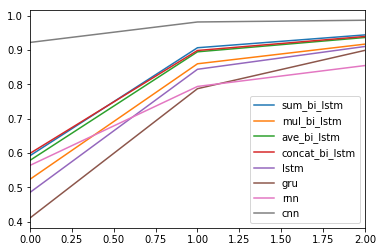

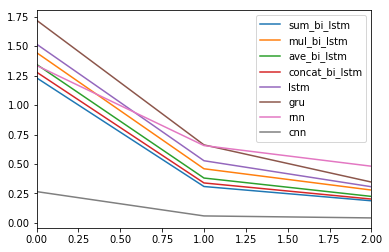

In [64]:
# line plot of results
print('accuracy')
results.plot()
print('loss')
lossresults.plot()

pyplot.show()